# EDA y ETL

In [2]:
# Importo las librerias que usaré
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargo ruta de la data
homicidios_excel = 'datasets/homicidios.xlsx'

# Cargo el archivo de Excel en un DataFrame de Pandas
df_homicidios = pd.read_excel(homicidios_excel)

In [4]:
# Visualizo el df_homicidios para saber que debo transformar y/o limpiar
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ALTURA,CRUCE,DIRECCIÓN NORMALIZADA,COMUNA,XY (CABA),POS X,POS Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,01/01/2016,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,SD,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. Y FERNANDEZ DE LA CRUZ, F., G...",8,POINT (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,02/01/2016,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,SD,DE LOS CORRALES AV.,"PAZ, GRAL. AV. Y DE LOS CORRALES AV.",9,POINT (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,03/01/2016,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034,SD,ENTRE RIOS AV. 2034,1,POINT (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,10/01/2016,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,SD,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. Y VILLEGAS, CONRADO, GRAL.",8,POINT (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,21/01/2016,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,SD,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. Y SAENZ PEÃ‘A, LUIS, PRES.",1,POINT (106980.32827929 100752.16915795),-58.38718297,-34.6224663,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     696 non-null    object
 1   N_VICTIMAS             696 non-null    int64 
 2   FECHA                  696 non-null    object
 3   AAAA                   696 non-null    int64 
 4   MM                     696 non-null    int64 
 5   DD                     696 non-null    int64 
 6   HORA                   694 non-null    object
 7   HH                     696 non-null    object
 8   LUGAR_DEL_HECHO        696 non-null    object
 9   TIPO_DE_CALLE          696 non-null    object
 10  CALLE                  696 non-null    object
 11  ALTURA                 696 non-null    object
 12  CRUCE                  696 non-null    object
 13  DIRECCIÓN NORMALIZADA  696 non-null    object
 14  COMUNA                 696 non-null    int64 
 15  XY (CABA)              

Voy a cambiar todas las columnas que contengan valores de tipo 'str' a letras mayúsculas. Además, eliminaré duplicados, si existen, y eliminaré las filas que contengan valores nulos en todas las columnas. Reemplazaré los valores nulos en todas las columnas por 'SD', eliminaré las tildes en los datos str y finalmente cambiaré el tipo de dato de algunas columnas.

---

### Cambiar todas las columnas que contengan valores de tipo 'str' a letras mayúsculas

In [4]:
# Convertir todas las columnas a mayúsculas
df_homicidios = df_homicidios.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# Convertir los nombres de las columnas a mayúsculas
df_homicidios.columns = df_homicidios.columns.str.upper()

In [5]:
df_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'CALLE', 'ALTURA', 'CRUCE',
       'DIRECCIÓN NORMALIZADA', 'COMUNA', 'XY (CABA)', 'POS X', 'POS Y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

---

### Observo si hay valores duplicados, de ser así los elimino

In [6]:
# Identifico filas duplicadas basadas en todas las columnas
duplicados_columns = df_homicidios[df_homicidios.duplicated(subset=['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'CALLE', 'ALTURA', 'CRUCE',
       'DIRECCIÓN NORMALIZADA', 'COMUNA', 'XY (CABA)', 'POS X', 'POS Y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'])]

# Mostrar las filas duplicadas
print(duplicados_columns)

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, CALLE, ALTURA, CRUCE, DIRECCIÓN NORMALIZADA, COMUNA, XY (CABA), POS X, POS Y, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []

[0 rows x 21 columns]


No hay duplicados

---

### Observo si hay valores nulos, de ser así los elimino

In [7]:
# Verifico si hay valores nulos en todo el DataFrame
valores_nulos = df_homicidios.isnull().any()

# Mostrar qué columnas tienen valores nulos
print(valores_nulos)

ID                       False
N_VICTIMAS               False
FECHA                    False
AAAA                     False
MM                       False
DD                       False
HORA                     False
HH                       False
LUGAR_DEL_HECHO          False
TIPO_DE_CALLE            False
CALLE                    False
ALTURA                   False
CRUCE                    False
DIRECCIÓN NORMALIZADA    False
COMUNA                   False
XY (CABA)                False
POS X                    False
POS Y                    False
PARTICIPANTES            False
VICTIMA                  False
ACUSADO                  False
dtype: bool


Hay valores nulos, procedo a eliminarlos

In [8]:
# Elimino filas completamente nulas
df_homicidios.dropna(how='all', inplace=True)

---

### Reemplazo los valores null por 'SD' (SInDato)

In [9]:
# Reemplazar los valores nulos de cada columna por 'SD'
df_homicidios = df_homicidios.fillna(value='SD')

---

### Elimino asteriscos y tildes de toda la tabla

In [10]:
# Eliminar asteriscos en todo el DataFrame
df_homicidios.replace('*', '', inplace=True)

---

### Cambio el tipo de dato

In [11]:
# Cambio el tipo de la columna 'NOMBRE_DE_LA_COLUMNA' a objeto (cadena de texto)
df_homicidios['HORA'] = df_homicidios['HORA'].astype(str)

# Converto la columna 'HORA' a tipo cadena
df_homicidios['HORA'] = df_homicidios['HORA'].astype(str)

# Limpio la columna 'HORA' eliminando cualquier caracter no numérico
df_homicidios['HORA'] = df_homicidios['HORA'].str.replace(r'[^0-9:]', '', regex=True)

# Elimino filas con valores nulos en la columna 'HORA'
df_homicidios = df_homicidios.dropna(subset=['HORA'])

# Trato específicamente el valor "1401190007:12"
df_homicidios['HORA'] = df_homicidios['HORA'].replace({'1401190007:12': '07:12:00', '0401190018:40': '18:40:00'})

# Convierto la columna 'HORA' a tipo datetime y extraer solo la hora
df_homicidios['HORA'] = pd.to_datetime(df_homicidios['HORA'], format='%H:%M:%S', errors='coerce').dt.time

---

In [12]:
# Visualizo los cambios
df_homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ALTURA,CRUCE,DIRECCIÓN NORMALIZADA,COMUNA,XY (CABA),POS X,POS Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,01/01/2016,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,SD,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. Y FERNANDEZ DE LA CRUZ, F., G...",8,POINT (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,02/01/2016,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,SD,DE LOS CORRALES AV.,"PAZ, GRAL. AV. Y DE LOS CORRALES AV.",9,POINT (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,03/01/2016,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034,SD,ENTRE RIOS AV. 2034,1,POINT (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [13]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     696 non-null    object
 1   N_VICTIMAS             696 non-null    int64 
 2   FECHA                  696 non-null    object
 3   AAAA                   696 non-null    int64 
 4   MM                     696 non-null    int64 
 5   DD                     696 non-null    int64 
 6   HORA                   694 non-null    object
 7   HH                     696 non-null    object
 8   LUGAR_DEL_HECHO        696 non-null    object
 9   TIPO_DE_CALLE          696 non-null    object
 10  CALLE                  696 non-null    object
 11  ALTURA                 696 non-null    object
 12  CRUCE                  696 non-null    object
 13  DIRECCIÓN NORMALIZADA  696 non-null    object
 14  COMUNA                 696 non-null    int64 
 15  XY (CABA)              

Guardo todos los cambios

In [14]:
ruta_guardado = './datasets/homicidios.xlsx'

# Guardar el DataFrame en un archivo CSV
df_homicidios.to_excel(ruta_guardado, index=False)

# Esto guardará el DataFrame 'df_homicidios'

---

## Comenzaré visualizar algunas relaciones que se pueden realizar ahora con los datos ya limpios

### Este código muestra la distribución del número total de víctimas a lo largo de los años registrados en el archivo 'homicidios' (2016-2021), lo que permite identificar tendencias o variaciones significativas en función del año. Asigno el tono más intenso de naranja al año con el mayor número de víctimas y degradará los colores hacia uno mas claro para los años con menor número de víctimas.

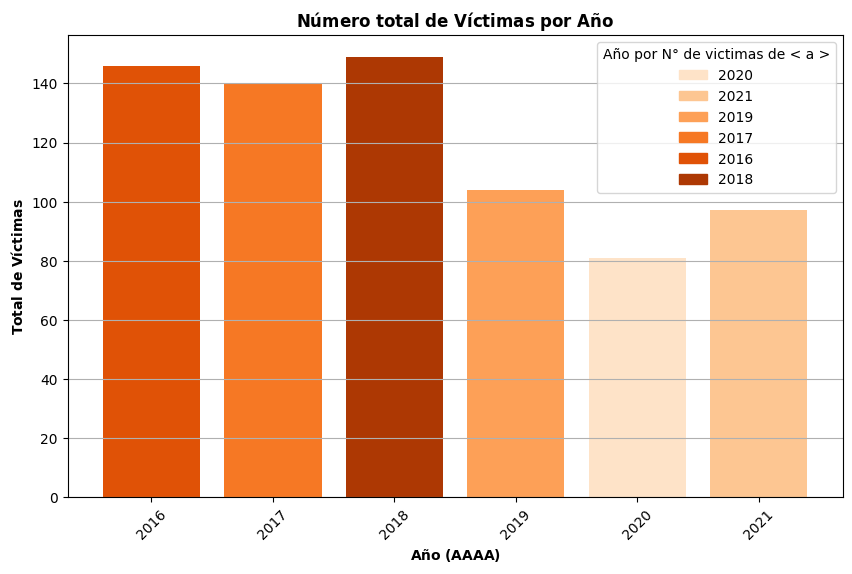

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por año ('AAAA') y sumar el número de víctimas para cada año
victimas_por_año = df_homicidios.groupby('AAAA')['N_VICTIMAS'].sum()

# Ordenar los años por cantidad de víctimas y asignar un color a cada año
sorted_years = victimas_por_año.sort_values(ascending=True)  # Orden descendente
color_palette = sns.color_palette("Oranges", n_colors=len(victimas_por_año))
color_dict = {year: color_palette[i] for i, year in enumerate(sorted_years.index)}

# Graficar el número de víctimas por año con colores asignados
plt.figure(figsize=(10, 6))
bars = plt.bar(victimas_por_año.index, victimas_por_año, 
               color=[color_dict[year] for year in victimas_por_año.index])

# Configuración adicional del gráfico
plt.xlabel(r'$\bf{Año\ (AAAA)}$')
plt.ylabel(r'$\bf{Total\ de\ Víctimas}$')
plt.title(r'$\bf{Número\ total\ de\ Víctimas\ por\ Año}$')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Generar la leyenda de colores
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[year]) for year in sorted_years.index]
plt.legend(legend_handles, sorted_years.index, title='Año por N° de victimas de < a >')

plt.show()

El gráfico de barras revela que el recuento total de víctimas mostró poca variación entre 2016 y 2018, pero a partir de 2019 hasta 2020, hubo una disminución constante y significativa en el número de víctimas.

Se observa una marcada tendencia descendente, especialmente en 2020. Una explicación hipotética de esta marcada disminución en 2020 podría estar relacionada con la pandemia. El contexto de confinamiento forzado y restricciones de movilidad pudo haber contribuido a esta reducción en la cantidad de víctimas registradas.

Este descenso notable podría ser atribuido a las medidas implementadas para contener la propagación del virus, limitando así la movilidad y actividad fuera de los hogares.
Esta explicación se basa en la observación de una tendencia decreciente en los incidentes reportados y en la correlación temporal con el período de la pandemia.

---

### Este código generará un gráfico de barras que muestra el número total de víctimas para cada tipo de víctima. El tipo de víctima con más víctimas se resaltará en rojo en el gráfico

Tipo de víctima con más víctimas: MOTO


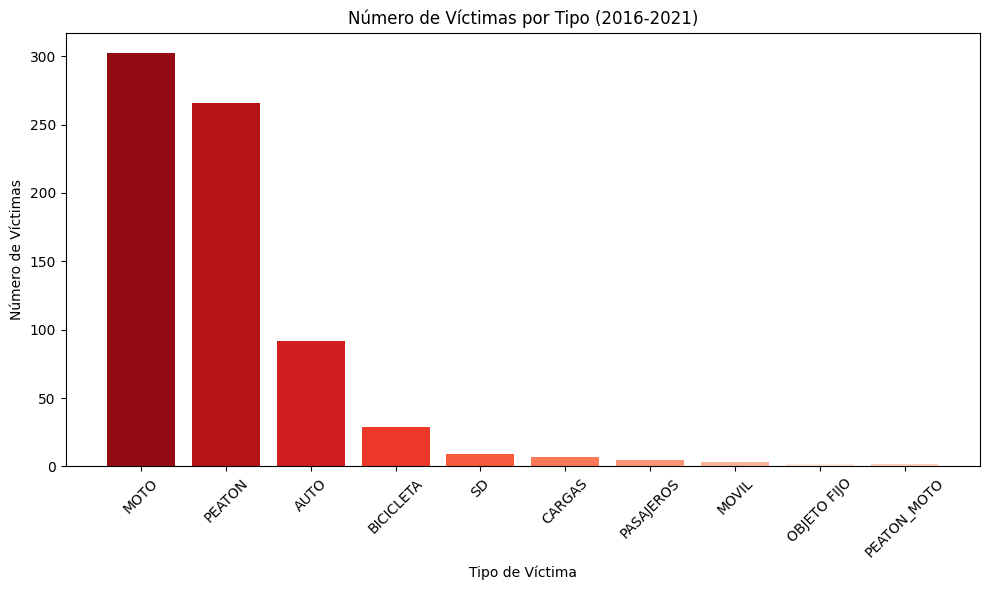

In [ ]:
# Filtrar datos para el rango de años 2016 a 2021
filtro_anios = (df_homicidios['AAAA'] >= 2016) & (df_homicidios['AAAA'] <= 2021)
datos_filtrados = df_homicidios[filtro_anios]

# Calcular el número total de víctimas por tipo de víctima
datos_por_tipo_victima = datos_filtrados.groupby('VICTIMA')['N_VICTIMAS'].sum().sort_values(ascending=False)

# Obtener el tipo de víctima con más víctimas
tipo_victima_mas_victimas = datos_por_tipo_victima.idxmax()
print("Tipo de víctima con más víctimas:", tipo_victima_mas_victimas)

# Obtener la paleta de colores desde el amarillo al rojo
n = len(datos_por_tipo_victima)
color_palette = sns.color_palette("Reds", n_colors=n)

# Ordenar los tipos de víctimas por cantidad de víctimas y asignar un color a cada una
sorted_victims = datos_por_tipo_victima.sort_values(ascending=True)
color_dict = {victim: color_palette[i] for i, victim in enumerate(sorted_victims.index)}

# Graficar el número de víctimas por tipo con colores asignados
plt.figure(figsize=(10, 6))
bars = plt.bar(datos_por_tipo_victima.index, datos_por_tipo_victima, 
               color=[color_dict[v] if v != tipo_victima_mas_victimas else color_palette[-1] for v in datos_por_tipo_victima.index])

plt.title('Número de Víctimas por Tipo (2016-2021)')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

### Calculo el porcentaje total de víctimas Peatones y Motocicletas para los años 2016-2021 y muestro un único gráfico de torta que representa el porcentaje de víctimas de cada tipo en relación al total para estos años seleccionados.

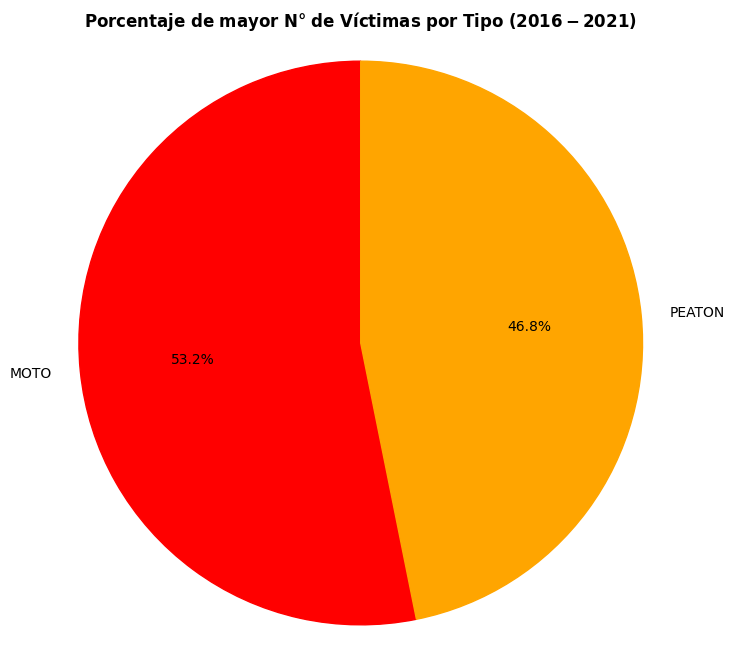

In [ ]:
# Filtrar las filas donde 'VICTIMA' es 'AUTO' o 'MOTO'
victimas_auto_moto = df_homicidios[df_homicidios['VICTIMA'].isin(['MOTO', 'PEATON'])]

# Seleccionar los años que deseas incluir
años_seleccionados = [2016, 2017, 2018, 2019, 2020, 2021]

# Filtrar las filas para los años seleccionados
victimas_seleccionadas = victimas_auto_moto[victimas_auto_moto['AAAA'].isin(años_seleccionados)]

# Calcular el total de víctimas por tipo para los años seleccionados
victimas_por_tipo = victimas_seleccionadas.groupby('VICTIMA')['N_VICTIMAS'].sum()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
pie = plt.pie(victimas_por_tipo, labels=victimas_por_tipo.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(r'$\bf{Porcentaje\ de\ mayor\ N°\ de\ Víctimas\ por\ Tipo\ (2016-2021)}$')

# Encontrar el índice del tipo de víctima con el mayor número de víctimas
indice_mayor_victima = victimas_por_tipo.idxmax()

# Colores para los segmentos
colores = ['orange' if tipo != indice_mayor_victima else 'red' for tipo in victimas_por_tipo.index]

# Modificar los colores de los segmentos en el gráfico
for i, patch in enumerate(pie[0]):
    patch.set_color(colores[i])

plt.show()

El gráfico revela una marcada diferencia en la proporción de víctimas entre peatones y motocicletas a lo largo de los años registrados.

Se destaca que, en promedio, el 53.2% de las víctimas correspondieron a motocicletas, evidenciando una predominancia minima en comparación con las víctimas peatones durante este período.

Este hallazgo subraya la relevancia de considerar las circunstancias y factores asociados a las víctimas de motocicletas al desarrollar estrategias para la prevención de incidentes viales y la mejora de la seguridad vial en la zona

---

### Identifico el acusado con el mayor número de incidentes.

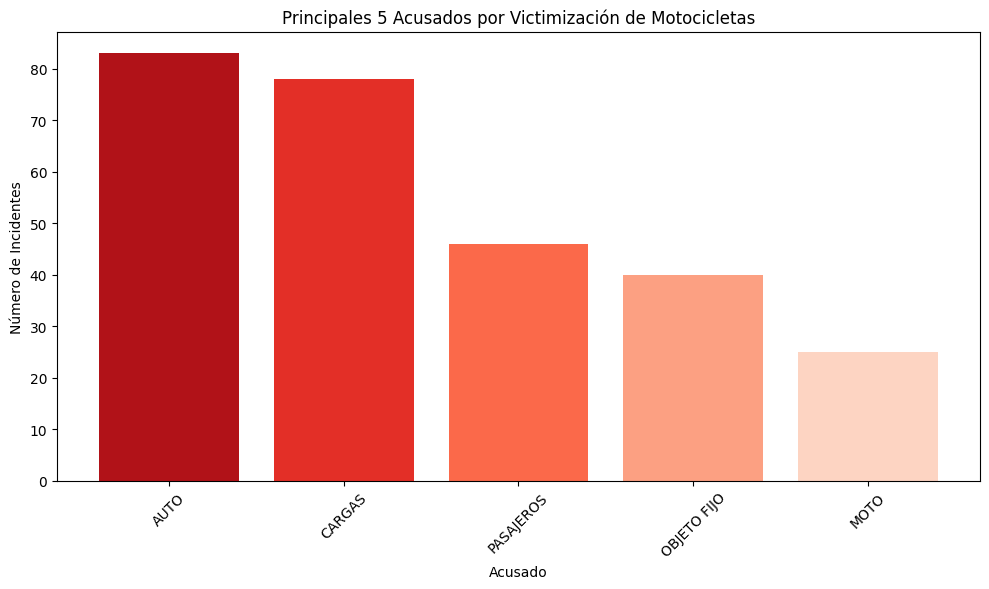

In [ ]:
# Filtrar los datos para aquellos relacionados con motocicletas
datos_motocicletas = df_homicidios[df_homicidios['VICTIMA'] == 'MOTO']

# Contar la frecuencia de acusados relacionados con motocicletas y ordenarlos por número de incidentes
acusados_por_motocicleta = datos_motocicletas['ACUSADO'].value_counts().sort_values(ascending=False).head(5)

# Crear la paleta de colores desde el menos intenso al más intenso
n = len(acusados_por_motocicleta)
color_palette = sns.color_palette("Reds", n_colors=n)
color_dict = {acusado: color_palette[i] for i, acusado in enumerate(acusados_por_motocicleta.index[::-1])}

# Crear el gráfico de barras con colores asignados
plt.figure(figsize=(10, 6))
bars = plt.bar(acusados_por_motocicleta.index, acusados_por_motocicleta, 
               color=[color_dict[acusado] for acusado in acusados_por_motocicleta.index])

plt.title('Principales 5 Acusados por Victimización de Motocicletas')
plt.xlabel('Acusado')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Los datos muestran de manera notable que los automóviles son la categoría predominante de acusados en incidentes viales que involucran motocicletas. Esta información resalta la relevancia significativa de los autos como parte fundamental en dichos siniestros.

---